#🎯 Objetivos da Aula

* Entender o que significa rejeitar ou não rejeitar a hipótese nula.
* Saber interpretar resultados significativos e não significativos.
* Compreender a diferença entre significância estatística e significância prática.
* Avaliar resultados com senso crítico: poder, replicação e plausibilidade.

#🏷️ Introdução

O teste de hipóteses é uma ferramenta central em estatística para avaliar se há evidências suficientes nos dados para rejeitar uma suposição inicial (hipótese nula).

A ideia é sempre:
* Começamos assumindo que não há efeito (hipótese nula).
* Coletamos dados.
* Avaliamos se há evidência suficiente para rejeitar H0.



Cuidado com os termos:

* Rejeitar H0 = Encontrar evidência contra o "não efeito".
* Quando isso não ocorre, optamos por não rejeitar H0. Isso é diferente de aceitar H0. Significa apenas que não encontramos evidência suficiente. **"Ausência de evidência não é evidência de ausência."**

**Analogia Clássica: o Tribunal**

* O réu começa sendo considerado inocente (hipótese nula).
* Se houver provas fortes → condenamos (rejeitamos a hipótese de inocência).
* Se não houver provas suficientes → não condenamos. Mas isso não prova que o réu seja inocente! Talvez o réu seja culpado, mas as provas foram insuficientes.

#📚 Interpretando resultados significantes

✅ O que significa valor-p menor que o limiar de significância definido previamente (alfa):
* Valor-p ≤ 𝛼 → Rejeitamos 𝐻0.
* Existe evidência de que há algum efeito.

⚡ Cuidado:  Significância estatística ≠ Significância prática
* Valor-p não mede o tamanho do efeito.
* Pode existir significância estatística para um efeito muito pequeno e irrelevante.

#📚 Interpretando resultados não sigficantes

🚫 O que significa valor-p alto
* Valor-p >α → Não rejeitamos 𝐻0.
* Não encontramos evidência suficiente para efeito.
* Não significa que o efeito não exista.

🧩 Possíveis causas para não detectar efeito:
* Efeito real pequeno.
* Amostra muito pequena.
* Alta variabilidade nos dados.

#📚 P-Hacking

Em experimentos reais, testamos muitas hipóteses ao mesmo tempo (vários grupos, métricas, análises). Quanto mais testes fazemos, maior a chance de encontrar falso positivo só por acaso. E assim, sem correções, nossas conclusões podem ser enganosas.

**🚨 Exemplo do Problema dos Múltiplos Testes na Saúde**

Imagine que você está avaliando: 10 diferentes biomarcadores no sangue para prever risco de infarto. Para cada biomarcador, você testa se ele está associado a eventos cardíacos futuros. Se 𝛼 =0,05:

* Cada teste tem 5% de chance de gerar uma associação por acaso.
* Com 10 biomarcadores testados, a chance de encontrar pelo menos uma associação falsa sobe para ~40%!

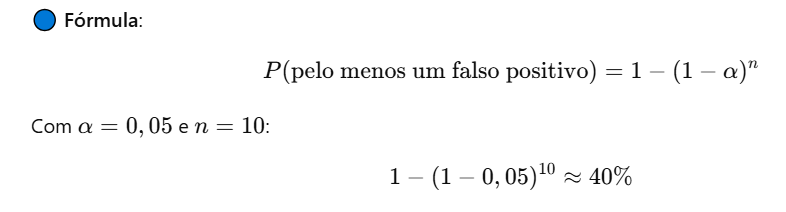

Mesmo se nenhum biomarcador tivesse relação real com infarto, ainda assim poderíamos achar 1 ou mais "associações significativas" só por sorte. Sem correções, poderíamos recomendar exames ou tratamentos desnecessários baseados em falsas descobertas.

**⚠️ O que é P-Hacking?**

P-hacking é "forçar" o valor-p a ficar abaixo de 0,05. Pode ser intencional ou involuntário:
* Testar múltiplas variáveis até achar algo "significativo".
* Repetir o teste mudando pequenas coisas.
* Selecionar só resultados favoráveis.

**🔴 Problema:**
* Gera falsas descobertas, inflando o Erro Tipo I (falso positivo).

**🛡️ Como se Proteger: Correções para Múltiplos Testes**

Quando aplicar correções:
* Vários testes dentro do mesmo conjunto de dados.
* Testes em subgrupos relacionados.
* Explorações de múltiplas métricas.

Quando não é necessário aplicar:
* Testes feitos em experimentos independentes.

**📚 Tipos de Correções**

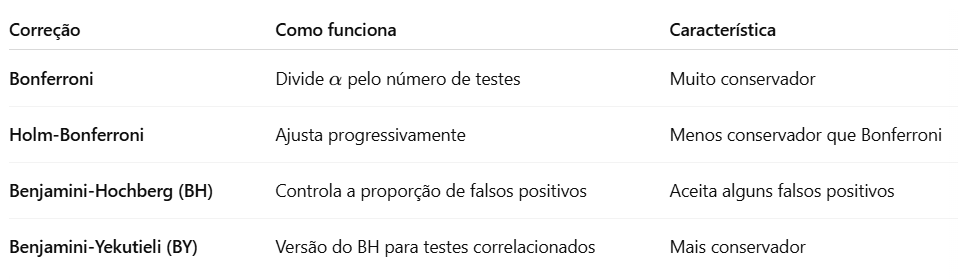

**✏️ Exemplo Prático: Bonferroni**

Você faz 10 testes. Quer manter um α global de 0,05. Ajuste Bonferroni:

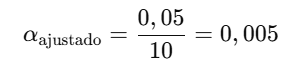

In [1]:
import numpy as np
from statsmodels.stats.multitest import multipletests

# P-valores dos testes
p_values = np.array([0.04, 0.06, 0.01, 0.03, 0.02, 0.15, 0.10, 0.05, 0.07, 0.12])

# Correção de Bonferroni
reject_bonf, p_bonf, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')

print("P-valores corrigidos (Bonferroni):", p_bonf)
print("Significativo após correção:", reject_bonf)


P-valores corrigidos (Bonferroni): [0.4 0.6 0.1 0.3 0.2 1.  1.  0.5 0.7 1. ]
Significativo após correção: [False False False False False False False False False False]


A correção de Bonferroni ajusta o p-valor para manter o nível de significância global controlado.

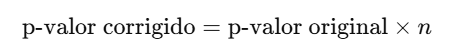

onde: n = número de testes realizados.

# 🧠 Como Avaliar um Resultado de Teste de Hipótese?

| Aspecto              | Pergunta crítica                                              |
|:---------------------|:---------------------------------------------------------------|
| Valor-p               | É pequeno o bastante? (menor que α)                            |
| Poder estatístico     | O estudo tinha chance razoável de detectar um efeito?          |
| Tamanho do efeito     | O efeito é grande o suficiente para importar?                  |
| Intervalo de confiança| O intervalo é estreito e exclui valores irrelevantes?           |
| Replicação            | Outros estudos encontraram o mesmo?                           |
| Plausibilidade        | A hipótese alternativa faz sentido teoricamente?              |




#👉 Aplicação em um exemplo

Suponha que um estudo testou um novo medicamento para aliviar dor de cabeça em comparação a um placebo. Os resultados foram:

* Valor-p = 0,04
* Diferença média de dor entre os grupos: 1 ponto numa escala de 0 a 10
* Intervalo de confiança: [0,2 ; 1,8]
* Poder estatístico planejado: 80%
* Outros estudos: Não replicado ainda
* Hipótese alternativa: Medicamento atua em mecanismos conhecidos da dor (plausível)

**Agora, vamos aplicar o pensamento crítico:**

| Aspecto               | Avaliação no exemplo |
|:----------------------|:---------------------|
| Valor-p                | É menor que α (0,05) → Rejeitamos \( H_0 \). Existe evidência estatística. |
| Poder estatístico      | 80% → O estudo tinha uma boa chance de detectar um efeito se ele existisse. |
| Tamanho do efeito      | A diferença média é apenas 1 ponto numa escala de 0–10 → efeito pequeno. Pode ser estatisticamente significativo, mas pouco relevante para o paciente. |
| Intervalo de confiança | De 0,2 a 1,8 pontos → Intervalo inclui efeitos muito pequenos (perto de zero), então a incerteza é relevante. |
| Replicação             | Ainda não foi replicado → precisamos de mais estudos para confiar. |
| Plausibilidade         | A hipótese é plausível (atua em mecanismos conhecidos da dor). |


🎯 Interpretação final:
* Estatisticamente, o novo remédio parece funcionar.
* Mas o efeito é pequeno e o intervalo de confiança mostra incerteza.
* Ainda não há replicações para aumentar nossa confiança.



**Conclusão crítica:**

> "Embora o resultado seja estatisticamente significativo, o benefício clínico real é questionável. Precisamos de mais estudos para confirmar a eficácia e avaliar se o efeito é relevante na prática."